In [4]:
import pandas as pd
df = pd.read_csv("rent-ideal.csv")
df.head(5) # print the first 5 rows of data

,bedrooms,bathrooms,latitude,longitude,price
0,3,1.5,40.7145,-73.9425,3000
1,2,1.0,40.7947,-73.9667,5465
2,1,1.0,40.7388,-74.0018,2850
3,1,1.0,40.7539,-73.9677,3275
4,4,1.0,40.8241,-73.9493,3350


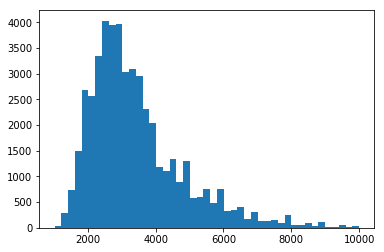

In [6]:
import matplotlib.pyplot as plt
plt.hist(df.price, bins=45)
plt.show()

In [9]:
import pandas as pd
df = pd.read_csv("rent.csv")
print(df.shape) # print rows, columns
df.head(2) # dump first 2 rows

(49352, 15)


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,['https://photos.renthop.com/2/7211212_1ed4542...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"['Doorman', 'Elevator', 'Fitness Center', 'Cat...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,['https://photos.renthop.com/2/7150865_be3306c...,5465,808 Columbus Avenue


In [10]:
df.head(2).T

,0,1
bathrooms,1.5,1
bedrooms,3,2
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130
created,2016-06-24 07:54:24,2016-06-12 12:19:27
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,
display_address,Metropolitan Avenue,Columbus Avenue
features,[],"['Doorman', 'Elevator', 'Fitness Center', 'Cat..."
interest_level,medium,low
latitude,40.7145,40.7947
listing_id,7211212,7150865


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        47906 non-null object
display_address    49217 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49342 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 5.6+ MB


In [12]:
df_num = df[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'price']]
df_num.head(2)

,bathrooms,bedrooms,longitude,latitude,price
0,1.5,3,-73.9425,40.7145,3000
1,1.0,2,-73.9667,40.7947,5465


In [17]:
df.created.min(), df.created.max()

('2016-04-01 22:12:41', '2016-06-29 21:41:47')

In [19]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_num, test_size=0.15) # 15% goes into test set

In [14]:
df_train.to_csv("rent-train.csv")
df_test.to_csv("rent-test.csv")

In [20]:
X_train = df_train[['bedrooms','bathrooms','latitude','longitude']]
y_train = df_train['price']

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)

In [24]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)